# Tarea 4
1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz. (Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos list, prueben hacer directamente $(list-S)/S$ ).

In [78]:
function f(x)
    return x^3-x^2-x-1
end


f (generic function with 1 method)

In [79]:
function df(x)
    return 3x^2-2x-1
end


df (generic function with 1 method)

In [80]:
function Newton(x0,N)
  
  
    list= zeros(N)
    for i in 1:N
      x0=x0-(f(x0)/df(x0))
     
           list[i]=x0 
    end
    return list
end

Newton (generic function with 1 method)

In [81]:
list1=Newton(1,50);
list2=Newton(5,50);
list3=Newton(8,50);
list4=Newton(15,50);

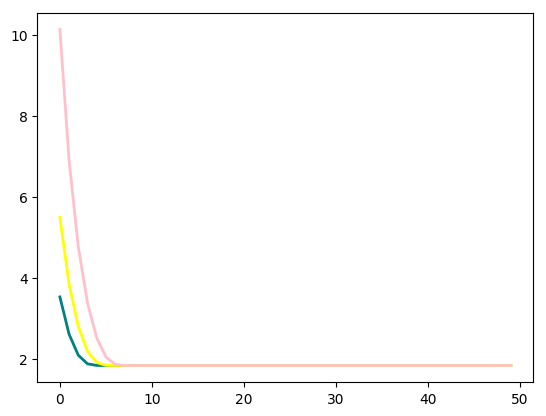

In [82]:
plot(real(list1),color="blue", linewidth=2.0)
plot(real(list2),color="teal", linewidth=2.0)
plot(real(list3),color="yellow", linewidth=2.0)
plot(real(list4),color="pink", linewidth=2.0)
show();

In [83]:
function NewtonE(x0,N)
 
    list= zeros(N)
    for i in 1:N
        x0=x0-(f(x0)/df(x0))
        list[i]=x0
    end
    return (list-list[N])/list[N] #Esto es el error
    

end


NewtonE (generic function with 1 method)

In [84]:
NewtonE(20,10)

10-element Array{Float64,1}:
 6.31846   
 3.95317   
 2.38431   
 1.35176   
 0.686223  
 0.281675  
 0.0739723 
 0.00713638
 7.61438e-5
 0.0       

In [85]:
list1=NewtonE(1,50);
list2=NewtonE(5,50);
list3=NewtonE(8,50);
list4=NewtonE(15,50);

In [86]:
using PyPlot

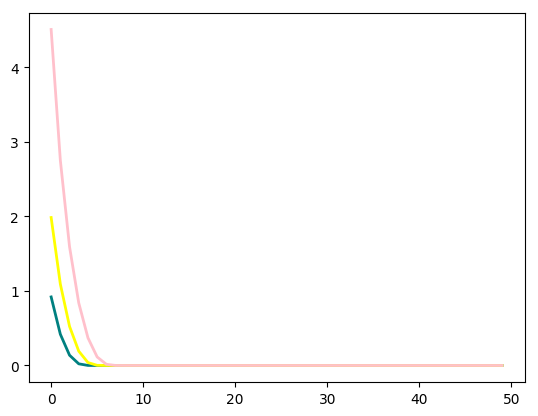

In [87]:
plot(real(list1),color="blue", linewidth=2.0)
plot(real(list2),color="teal", linewidth=2.0)
plot(real(list3),color="yellow", linewidth=2.0)
plot(real(list4),color="pink", linewidth=2.0)
show();

·Método de bisección


In [88]:
function biseccion(a,b,N)
    list=zeros(N)       #crea arreglo de N-numero de ceros 
    p = (a+b)/2         #p=raiz, a<p<b
    f(x)= x^3-x^2-x-1   #funcion de a la que queremos las raices 
    for i in 1:50       #para cada i entre 1 y 50...
        
        if  f(a)*f(p) > 0  #se evalua la funcion en a, se multiplica por f evaluada en p, si es > 0, a=p  
            a = p
        end
        
        if f(b)*f(p) > 0   #se evalua la funcion en b, se multiplica por f evaluada en p, si es > 0, a=p 
            b = p
        end
        
        p = (a+b)/2        
        list[i]=p          #llena el arreglo de N ceros creados con las raices 
        
    end
 
    return list
end

biseccion (generic function with 1 method)

In [89]:
list1=biseccion(0,50,50);
list2=biseccion(0,100,50);
list3=biseccion(0,150,50);
list4=biseccion(0,200,50);

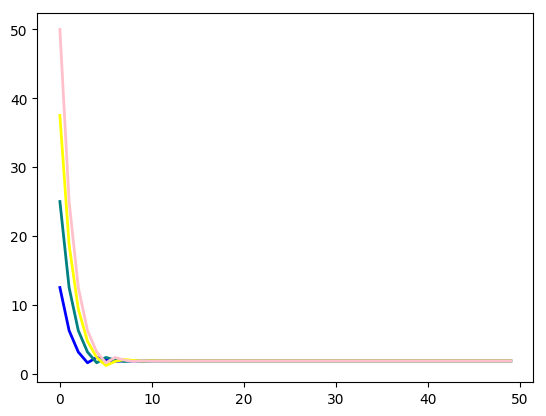

In [90]:
plot(real(list1),color="blue", linewidth=2.0)
plot(real(list2),color="teal", linewidth=2.0)
plot(real(list3),color="yellow", linewidth=2.0)
plot(real(list4),color="pink", linewidth=2.0)
show();

In [91]:
function biseccionE(a,b,N)
    p = (a+b)/2
    f(x)= x^3-x^2-x-1
    list=zeros(N)
    for i in 1:50                 #igualito que biseccion pero regresa el error 
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
       list[i]=p
    end
 
    (list-list[N])/list[N]        #error 
    
    return (list-list[N])/list[N]
end

biseccionE (generic function with 1 method)

In [92]:
list1=biseccionE(0,50,50);
list2=biseccionE(0,100,50);
list3=biseccionE(0,150,50);
list4=biseccionE(0,200,50);

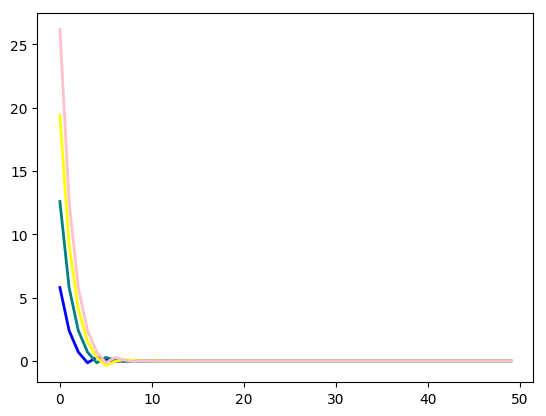

In [93]:
plot(real(list1),color="blue", linewidth=2.0)
plot(real(list2),color="teal", linewidth=2.0)
plot(real(list3),color="yellow", linewidth=2.0)
plot(real(list4),color="pink", linewidth=2.0)
show();


2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones (Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios):

·Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser metodo_newton(f,df,x0). El output debe ser alguna raíz.

·Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace. Es muy probable que funcione la rutina que crearon en el punto anterior llamandola como:
metodo_newton.(f,df,x) (noten el punto).

·Crear la misma rutina, pero que esta vez en lugar de dar como output todo el vector de raices (que inevitablemente estan repetidas), de solo la lista con la raices que son genuinamente diferentes hasta un $\epsilon$. Como tip, hagan $200$ iteraciones (quiza en realidad con $20$ baste), despues su rutina deberá guardar las raices diferentes en un vector, digamos $t$, aquí pueden usar push! para ir guardando las raíces en un vector inicializado como t=[]. El output tiene que ser precisamente t.

·(Lean bien este paso!) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.
Para esto deberán usar lo que aprendimos de SymPy y de como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.

·La función que reciba esta rutina debe ser de Julia y el output debe ser un flotante (No un número simbólico!), para la derivada pueden usar SymPy internamente, recuerden que es facil convertir funciones de Julia en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de Julia e iterarlas, consulten la parte donde vimos la función lambdify.

In [8]:
function NewtonF(f,df,x0)
    list=zeros[10]
    for i in 1:10
        x0=x0-(f(x0)/df(x0))
        list[i]=x0
    end
    return list
    
end
    

NewtonF (generic function with 1 method)

In [9]:
x0=linspace(1,10,200) #(inicial,final,particiones)

1.0:0.04522613065326633:10.0

In [10]:
list1=NewtonF(x-> x^3-x^2-x-1,x-> 3*x^2-2*x-1,x)     #x-> define x como el argumento de la funcion 
list2=NewtonF(x-> x^3-x^2-x-1,x-> 3*x^2-2*x-1,x)
list3=NewtonF(x-> x^3-x^2-x-1,x-> 3*x^2-2*x-1,x)
list4=NewtonF(x-> x^3-x^2-x-1,x-> 3*x^2-2*x-1,x)       #a partir de aqui no se que pasa :(

LoadError: [91mUndefVarError: x not defined[39m